In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
single_image= X_train[0]
single_image.shape

(28, 28)

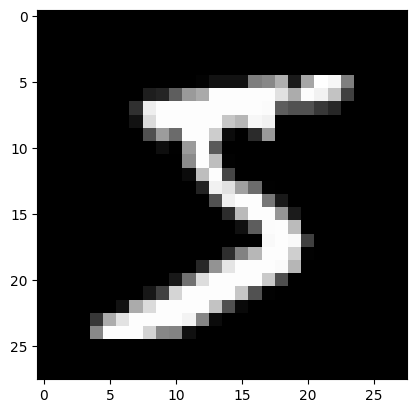

In [10]:
plt.imshow(single_image,cmap='gray')

In [11]:
y_train.shape

(60000,)

In [15]:
X_train.min()

0

In [14]:
X_train.max()

255

In [17]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [18]:
X_train_scaled.min()

0.0

In [19]:
X_train_scaled.max()

1.0

In [20]:
y_train[0]

5

In [24]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape

(60000, 10)

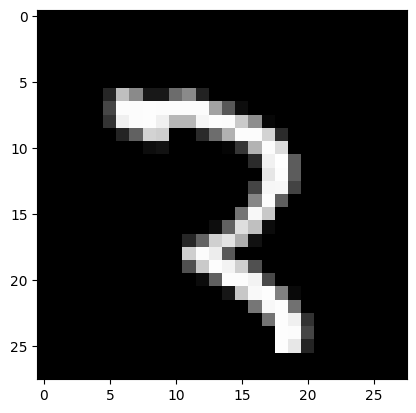

In [26]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [27]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
model = keras.Sequential([
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu",padding="same"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [33]:
model.compile(loss="categorical_crossentropy", metrics='accuracy',optimizer="adam")
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 59s 62ms/step - loss: 0.2579 - accuracy: 0.9235 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 2/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0709 - accuracy: 0.9784 - val_loss: 0.0556 - val_accuracy: 0.9822
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0512 - accuracy: 0.9840 - val_loss: 0.0423 - val_accuracy: 0.9855
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0444 - val_accuracy: 0.9858
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0334 - accuracy: 0.9897 - val_loss: 0.0580 - val_accuracy: 0.9804


In [36]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.257859,0.923517,0.085048,0.9724
1,0.070946,0.978383,0.055562,0.9822
2,0.051224,0.984050,0.042280,0.9855
3,0.039985,0.987367,0.044420,0.9858
4,0.033438,0.989667,0.058029,0.9804


<Axes: >

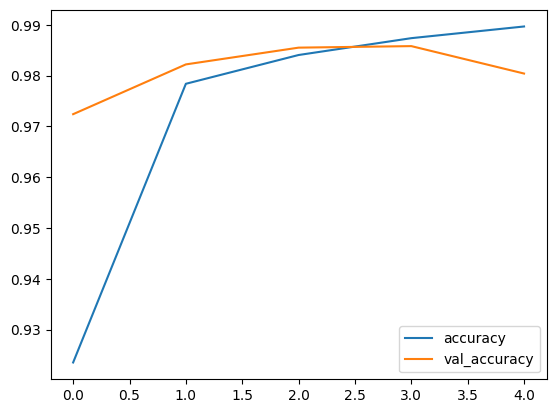

In [37]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

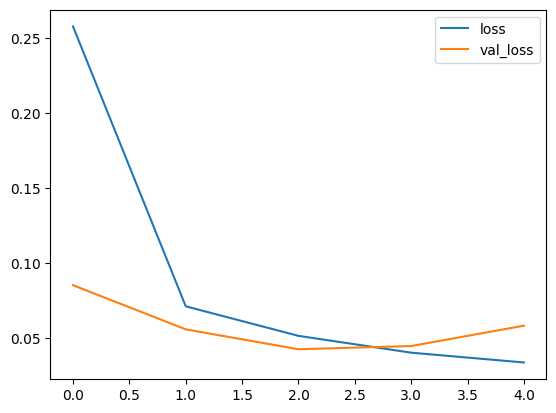

In [38]:
metrics[['loss','val_loss']].plot()

In [39]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 4s 12ms/step


In [40]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 966    0    0    0    0    9    4    1    0    0]
 [   0 1123    0    5    0    1    0    6    0    0]
 [   1    7  980   21    1    3    0   19    0    0]
 [   0    0    0  999    0    7    0    4    0    0]
 [   1    0    0    0  972    1    0    4    0    4]
 [   0    0    0    3    0  888    1    0    0    0]
 [   3    1    0    1    2   12  938    0    1    0]
 [   0    2    0    1    0    0    0 1024    1    0]
 [   1    0    0    6    0   11    1    3  951    1]
 [   1    1    0    4    6   18    1   11    4  963]]


In [41]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.95      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.99      0.99      0.99       982
           5       0.93      1.00      0.96       892
           6       0.99      0.98      0.99       958
           7       0.96      1.00      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



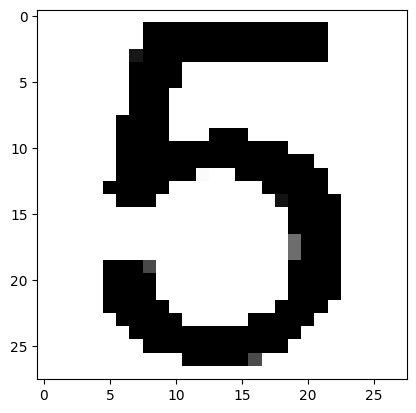

In [49]:
img = image.load_img('imgfive.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [50]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 35ms/step


In [51]:
print(x_single_prediction)

[5]
